In [43]:
# imports
import sys
sys.path.append('../')

from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from src.load_data import master_load
import tensorflow as tf
from tensorflow.math import confusion_matrix

In [44]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 24
plt.rcParams['figure.titlesize'] = 40
plt.rcParams['legend.loc'] = 'center right'

In [45]:
# load raw train data
actions = ['left', 'none', 'right']
data_dir = '../data/train'

data_dct = {}
for action in actions:
    if action not in data_dct:
        data_dct[action] = []

    data_sub_dir = os.path.join(data_dir, action)
    for item in os.listdir(data_sub_dir):
        data = np.load(os.path.join(data_sub_dir, item))
        for datum in data:
            data_dct[action].append(datum)

In [46]:
# obtain train sensor means
left = np.array(data_dct['left']).mean(axis=2)
none = np.array(data_dct['none']).mean(axis=2)
right = np.array(data_dct['right']).mean(axis=2)

In [47]:
# load raw test data
actions = ['left', 'none', 'right']
data_dir = '../data/test'

data_test_dct = {}
for action in actions:
    if action not in data_test_dct:
        data_test_dct[action] = []

    data_sub_dir = os.path.join(data_dir, action)
    for item in os.listdir(data_sub_dir):
        data = np.load(os.path.join(data_sub_dir, item))
        for datum in data:
            data_test_dct[action].append(datum)

In [48]:
# obtain test sensor means
left_test = np.array(data_test_dct['left']).mean(axis=2)
none_test = np.array(data_test_dct['none']).mean(axis=2)
right_test = np.array(data_test_dct['right']).mean(axis=2)

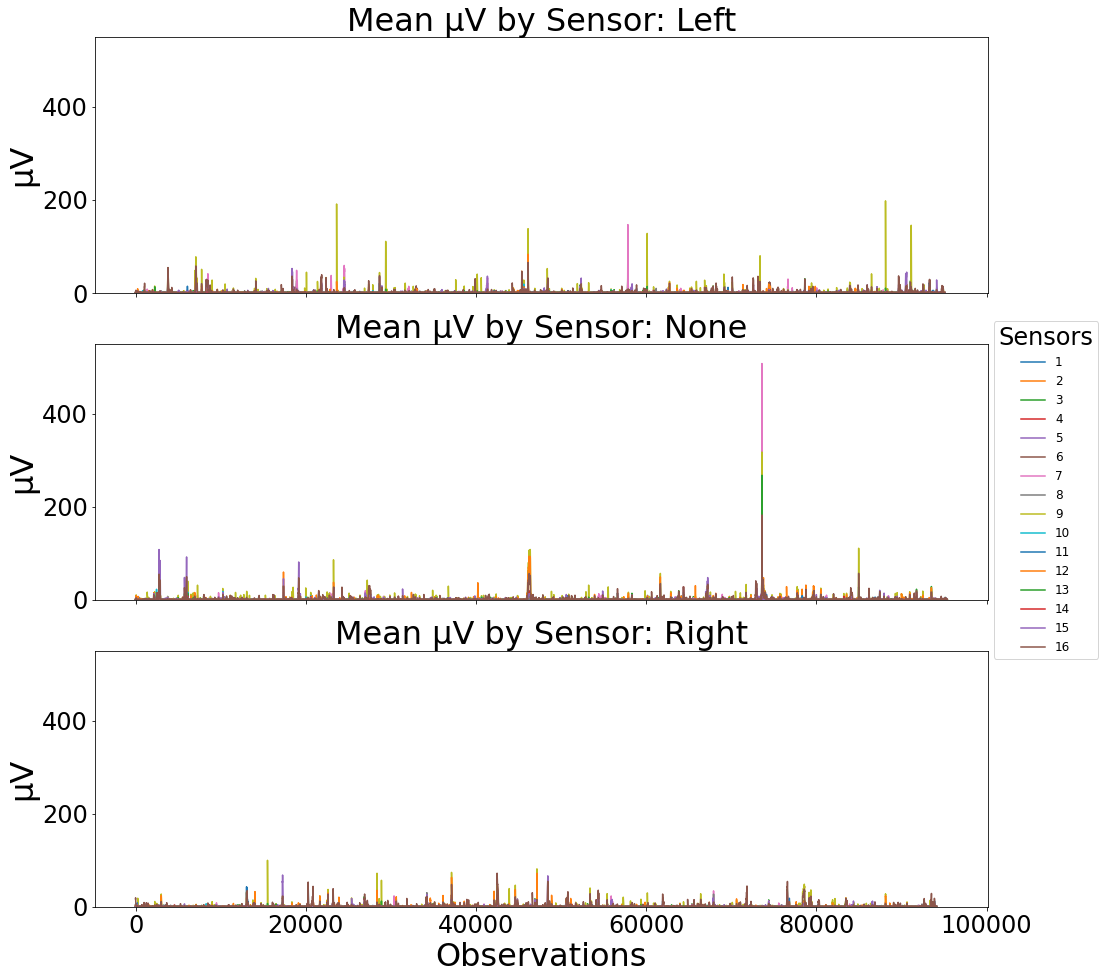

In [7]:
# plot mean microvolts by thought
fig, ax = plt.subplots(3, figsize=(16, 16), sharex=True)

ax[0].plot(left)
ax[0].set_ylabel('µV')
ax[0].set_title('Mean µV by Sensor: Left')
ax[0].set_ylim(0, 550)

ax[1].plot(none, label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
ax[1].set_ylabel('µV')
ax[1].set_title('Mean µV by Sensor: None')
ax[1].set_ylim(0, 550)

ax[2].plot(right)
ax[2].set_xlabel('Observations')
ax[2].set_ylabel('µV')
ax[2].set_title('Mean µV by Sensor: Right')
ax[2].set_ylim(0, 550)

fig.legend(title='Sensors')

plt.savefig('../img/mean_µv_by_sensor.png')

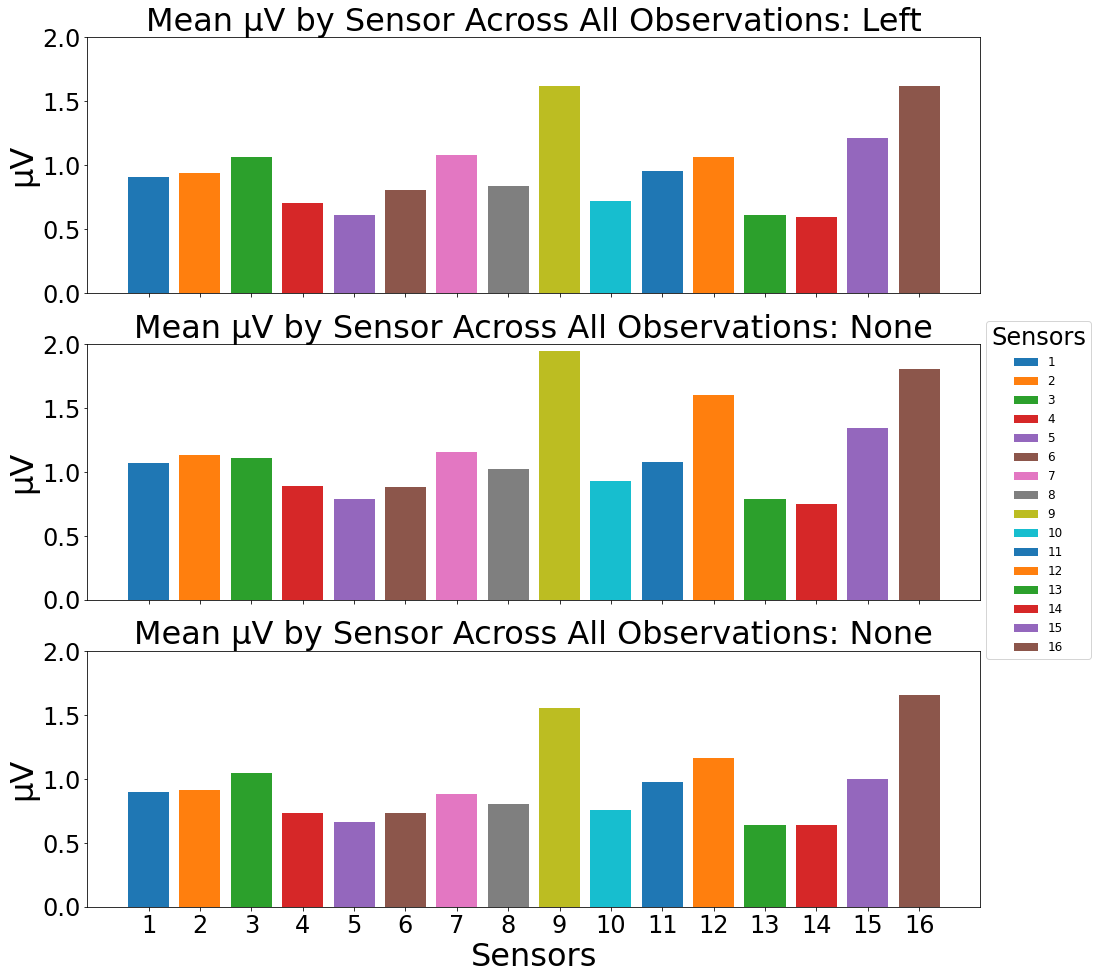

In [8]:
# plot mean microvolts by thought across all observations
fig, ax = plt.subplots(3, figsize=(16, 16), sharex=True)

x = np.arange(16)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
          'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange',
          'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

for i in x:
    ax[0].bar(x[i], left.mean(axis=0)[i], color=colors[i])
    ax[1].bar(x[i], none.mean(axis=0)[i], color=colors[i], label=x[i]+1)
    ax[2].bar(x[i], right.mean(axis=0)[i], color=colors[i])
    
ax[0].set_xticks(range(0, 16))
ax[0].set_xticklabels(range(1, 17))
ax[0].set_ylabel('µV')
ax[0].set_title('Mean µV by Sensor Across All Observations: Left')
ax[0].set_ylim(0, 2)

ax[1].set_xticks(range(0, 16))
ax[1].set_xticklabels(range(1, 17))    
ax[1].set_ylabel('µV')
ax[1].set_title('Mean µV by Sensor Across All Observations: None')
ax[1].set_ylim(0, 2)

ax[2].set_xticks(range(0, 16))
ax[2].set_xticklabels(range(1, 17))    
ax[2].set_xlabel('Sensors')
ax[2].set_ylabel('µV')
ax[2].set_title('Mean µV by Sensor Across All Observations: None')
ax[2].set_ylim(0, 2)

fig.legend(title='Sensors')
plt.savefig('../img/mean_µv_by_sensor_all_observations.png')

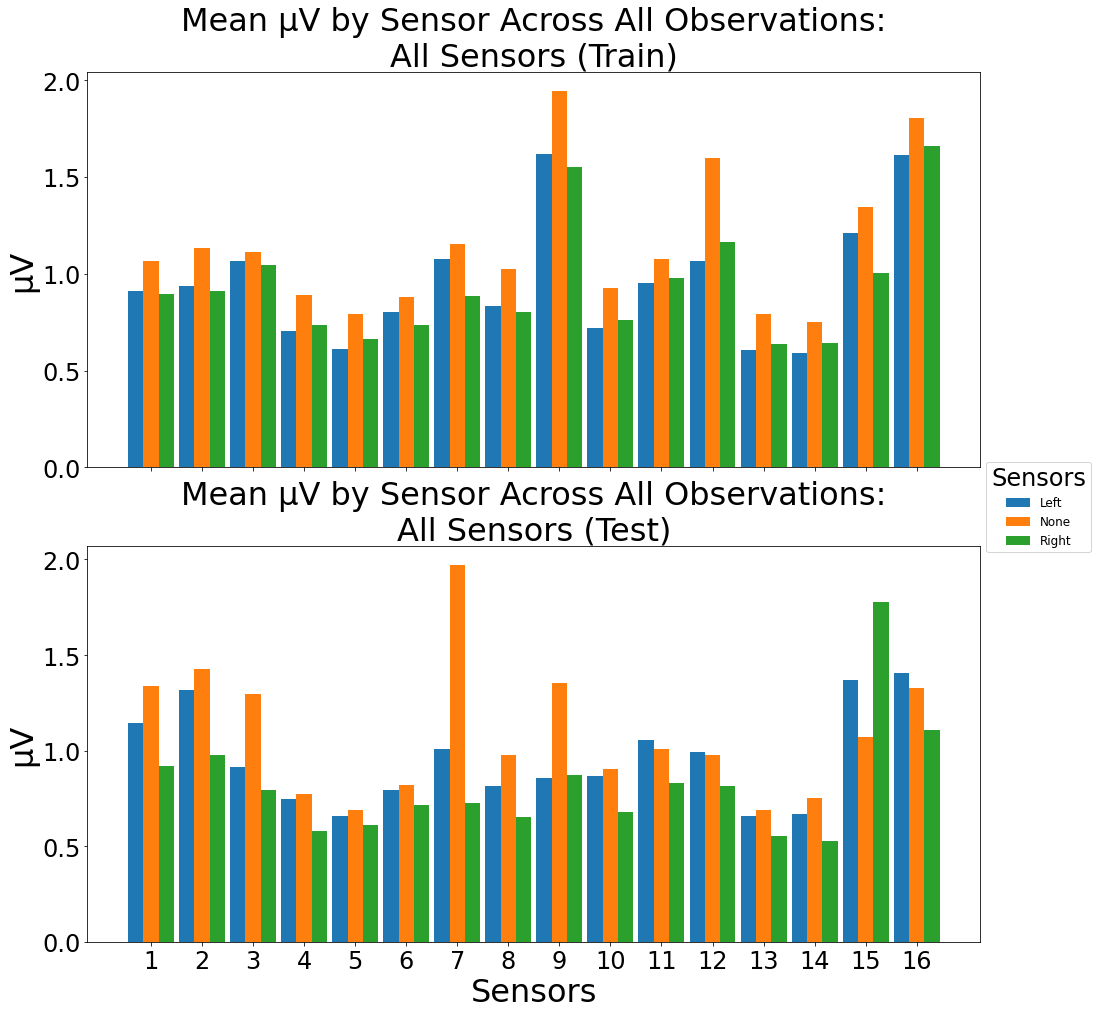

In [9]:
# plot mean microvolts by thought across all observations & sensors
fig, ax = plt.subplots(2, figsize=(16, 16), sharex=True)

bar_width = 0.3

ax[0].bar(x-bar_width, left.mean(axis=0), color=colors[0], width=bar_width)
ax[0].bar(x, none.mean(axis=0), color=colors[1], width=bar_width)
ax[0].bar(x+bar_width, right.mean(axis=0), color=colors[2], width=bar_width)

ax[0].set_xticks(range(0, 16))
ax[0].set_xticklabels(range(1, 17))    

ax[0].set_ylabel('µV')
ax[0].set_title('Mean µV by Sensor Across All Observations:\nAll Sensors (Train)')

ax[1].bar(x-bar_width, left_test.mean(axis=0), color=colors[0], label='Left', width=bar_width)
ax[1].bar(x, none_test.mean(axis=0), color=colors[1], label='None', width=bar_width)
ax[1].bar(x+bar_width, right_test.mean(axis=0), color=colors[2], label='Right', width=bar_width)

ax[1].set_xticks(range(0, 16))
ax[1].set_xticklabels(range(1, 17))    

ax[1].set_xlabel('Sensors')
ax[1].set_ylabel('µV')
ax[1].set_title('Mean µV by Sensor Across All Observations:\nAll Sensors (Test)')

fig.legend(title='Sensors')
plt.savefig('../img/mean_µv_by_sensor_all_observations_&_sensors.png')

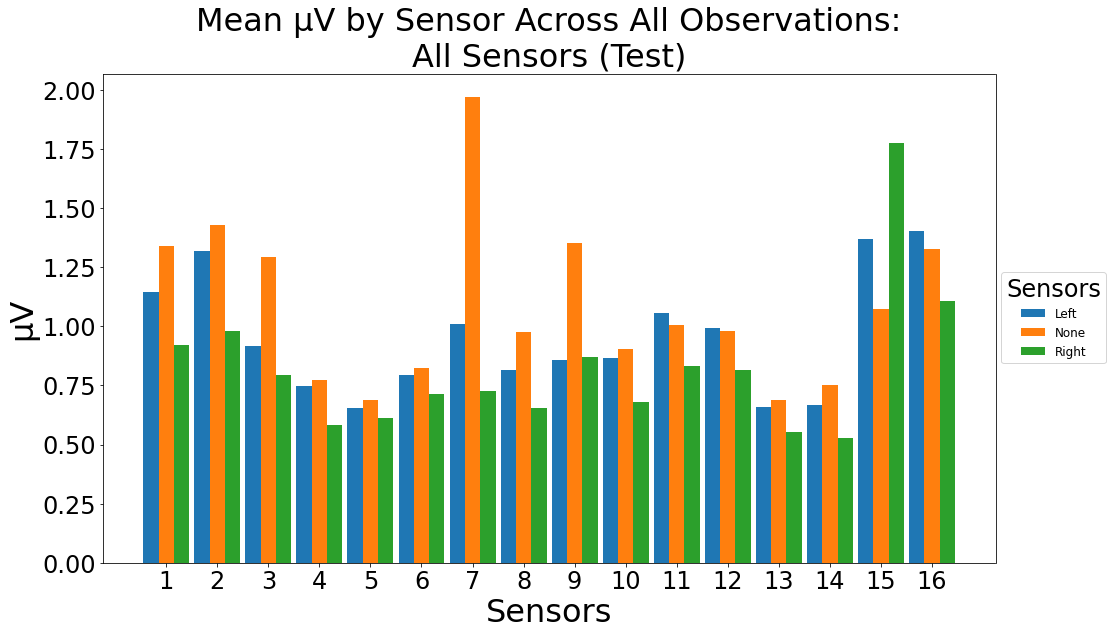

In [51]:
# plot mean microvolts by thought across all observations & sensors
fig, ax = plt.subplots(figsize=(16, 9), sharex=True)

bar_width = 0.3

ax.bar(x-bar_width, left_test.mean(axis=0), color=colors[0], label='Left', width=bar_width)
ax.bar(x, none_test.mean(axis=0), color=colors[1], label='None', width=bar_width)
ax.bar(x+bar_width, right_test.mean(axis=0), color=colors[2], label='Right', width=bar_width)

ax.set_xticks(range(0, 16))
ax.set_xticklabels(range(1, 17))    

ax.set_xlabel('Sensors')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor Across All Observations:\nAll Sensors (Test)')

fig.legend(title='Sensors')
plt.savefig('../img/mean_µv_by_sensor_all_observations_&_sensors.png')

In [31]:
# load fft data
X_train, X_test, y_train, y_test = master_load()

In [36]:
def plot_conf_mat(conf_mat):
    actions = ['left', 'none', 'right']

    fig, ax = plt.subplots(figsize=(16, 9))

    ax.matshow(conf_mat, cmap=plt.cm.RdYlGn)
    ax.set_xticklabels([""]+actions)
    ax.set_yticklabels([""]+actions)

    for i, val0 in enumerate(conf_mat.T):
        for ii, val1 in enumerate(val0):
            ax.text(i, ii, f"{val1:.3f}", va='center', ha='center')

    plt.title('Action Thought')
    plt.ylabel('Action Predicted')
    plt.savefig('../img/conf_matrix.png')

<ipython-input-36-a9e864ce6426>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+actions)
<ipython-input-36-a9e864ce6426>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+actions)


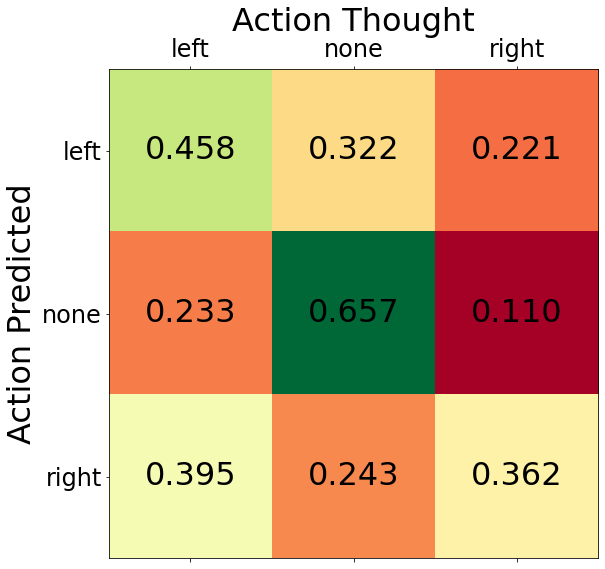

In [37]:
# make confusion matrix
best_numpy_model = sorted(glob('../models/numpy/*.model'))[-1]
model_numpy = tf.keras.models.load_model(best_numpy_model)

y_pred = np.argmax(model_numpy.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
conf_mat_numpy = np.round(np.array(confusion_matrix(y_true, y_pred)) / 11750, 3)

plot_conf_mat(conf_mat_numpy)